<a href="https://colab.research.google.com/github/Bimee-Stack/Machine-Learning-Coursework-2025/blob/main/Machine_Learning_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA)**

Load Dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#first few rows
print(df.head())

# Basic info:
print(df.shape)
print(df.info())
print(df.describe())

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]
(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService    

Check For Missing Values and Data Cleaning

In [13]:
# Check missing values
print(df.isnull().sum())


# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges'
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop 'customerID'
df.drop('customerID', axis=1, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-952128448.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Visualize Distributions

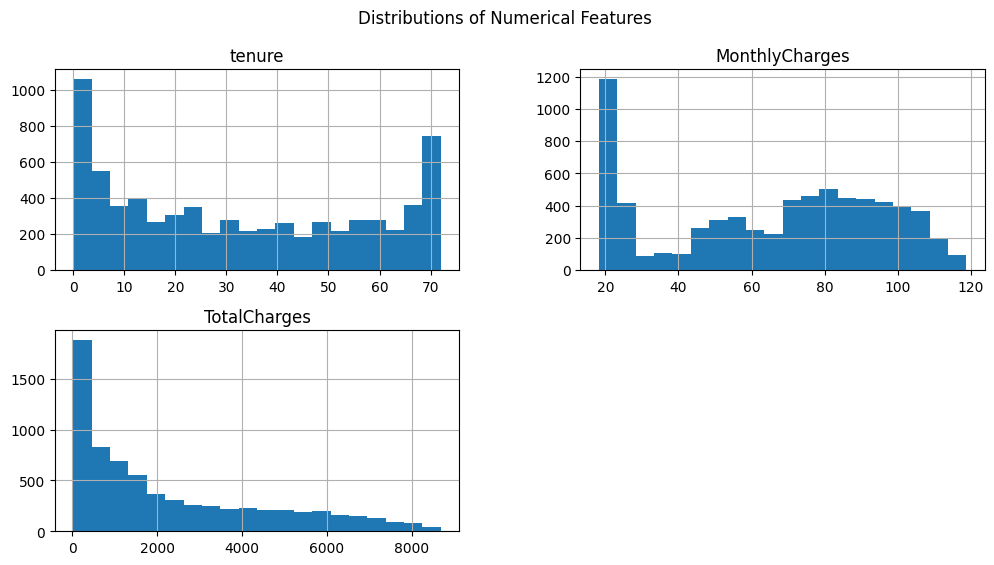

In [14]:
# Histograms
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(bins=20, figsize=(12, 6))
plt.suptitle('Distributions of Numerical Features')
plt.show()

Bar Plots

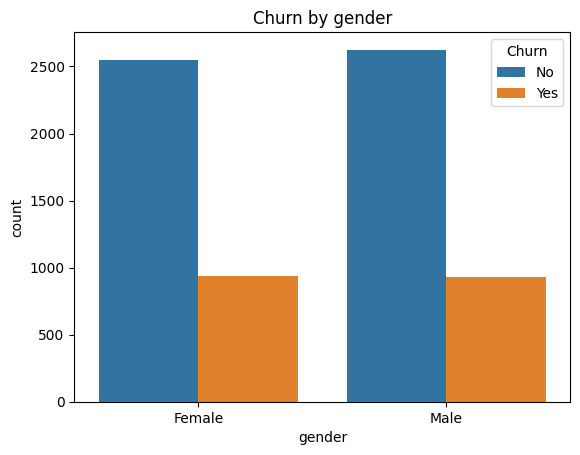

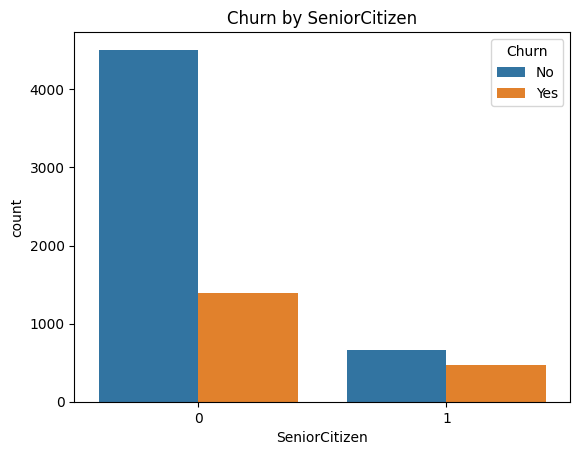

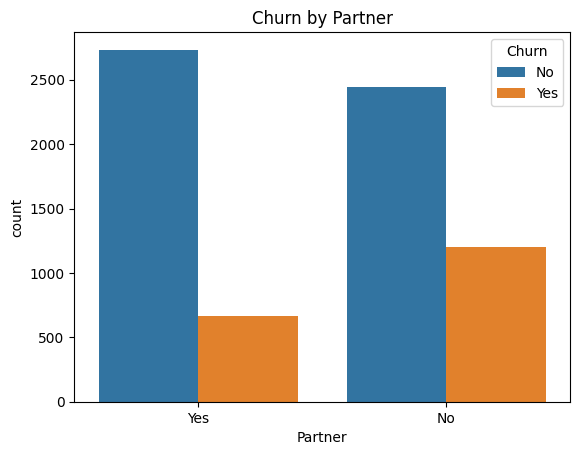

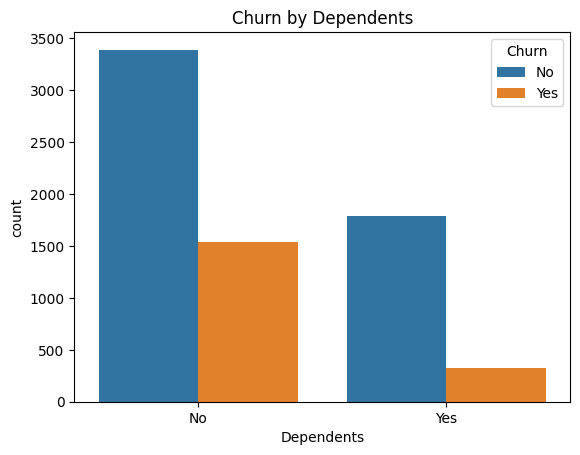

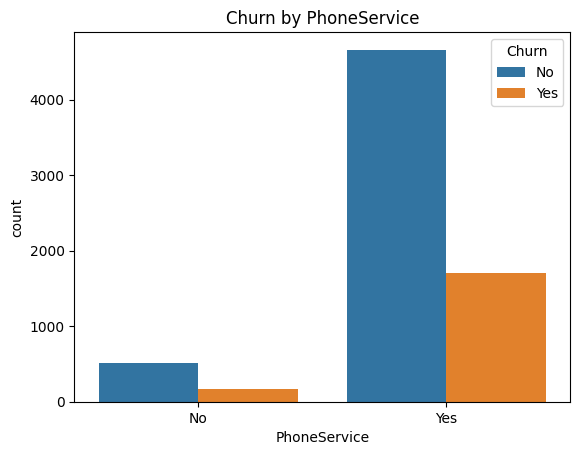

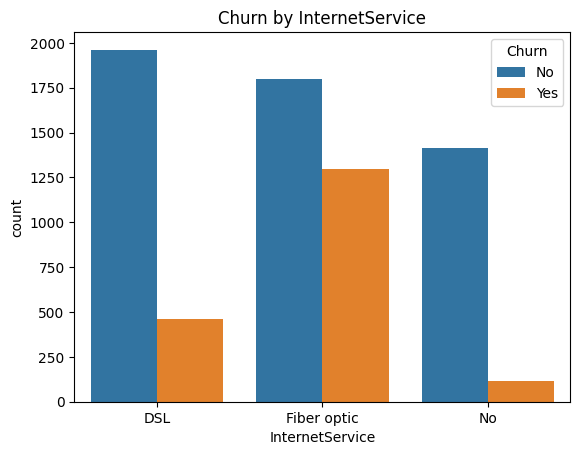

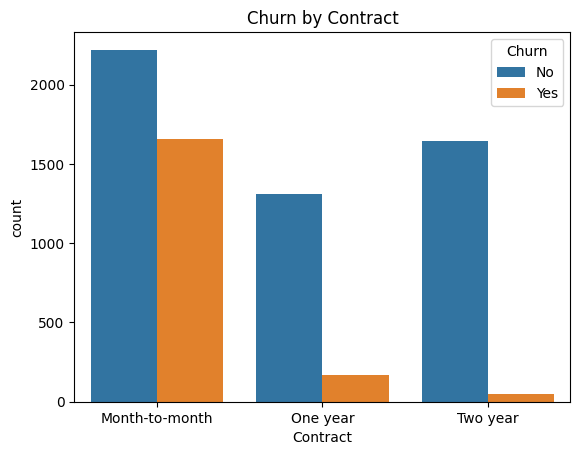

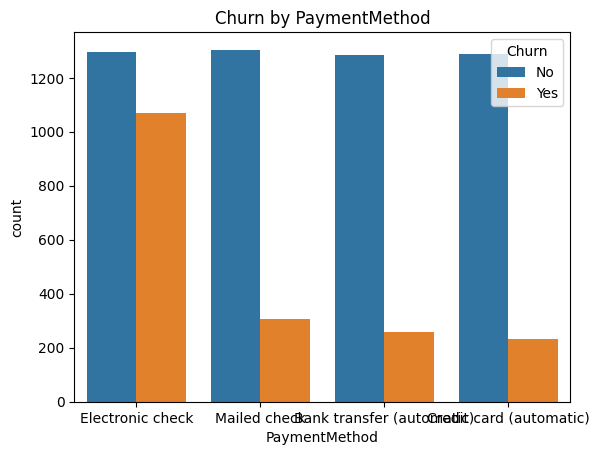

In [15]:
# Bar Graphs
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']

for col in cat_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.show()

Correlations and Other Visuals

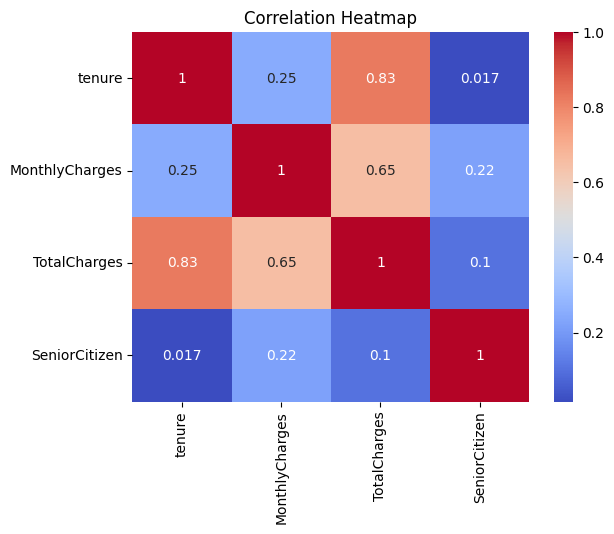

In [16]:
# Correlation matrix
corr = df[num_cols + ['SeniorCitizen']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Boxplot

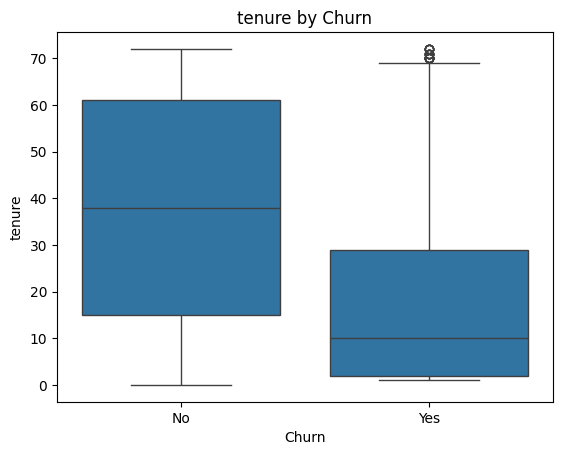

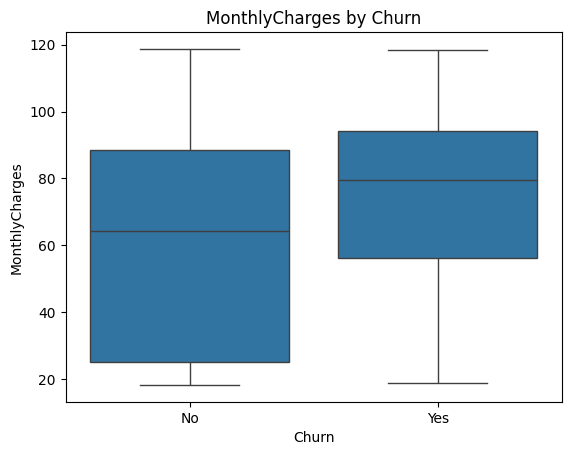

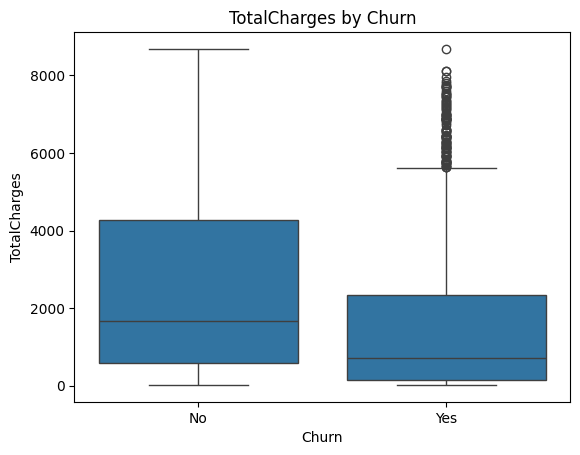

In [17]:
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()

**Implementation Classifiacation Task**

1.Data Preprocessing

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Data Cleaning
print("Duplicates:", df.duplicated().sum())

# Convert 'TotalCharges' to numeric and handle missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Missing after conversion:", df['TotalCharges'].isnull().sum())
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Standardize categorical values for consistency
cols_to_standardize = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_standardize:
    df[col] = df[col].replace('No internet service', 'No')
    df[col] = df[col].replace('No phone service', 'No')

# Drop irrelevant column
df.drop('customerID', axis=1, inplace=True)

# Handling Outliers
upper_limit = df['MonthlyCharges'].quantile(0.99)
df['MonthlyCharges'] = df['MonthlyCharges'].clip(upper=upper_limit)

 # Verify
print(df.info())

# 2. Data Integration:
external_data = pd.DataFrame({
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'Avg_Discount': [5.0, 10.0, 15.0]
})

# Merge on 'Contract'
df = pd.merge(df, external_data, on='Contract', how='left')
df['Avg_Discount'].fillna(0, inplace=True)

print(df.head())

# 3. Data Transformation:
# Feature Engineering: Create new useful features
df['TotalServices'] = (df['PhoneService'] == 'Yes').astype(int) + \
                      (df['InternetService'] != 'No').astype(int) + \
                      (df['StreamingTV'] == 'Yes').astype(int) + \
                      (df['StreamingMovies'] == 'Yes').astype(int)

df['TenureCategory'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['New', '1Year', '2Years', 'LongTerm'])

# Encoding: Convert categories to numbers
# Binary columns to 0/1
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if col == 'gender':
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# One-hot encoding for multi-category columns
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'TenureCategory']
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# Scaling: Normalize numerical features to same scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Avg_Discount']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())

# 4. Data Reduction: Feature selection and dimensionality reduction
# Split features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Feature Selection: Select top 15 features using ANOVA F-score
selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

# Dimensionality Reduction: Apply PCA to reduce to 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)
print("Explained Variance Ratio Sum:", pca.explained_variance_ratio_.sum())

# Train-Test Split: 80/20 split for modeling
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Final check
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



Duplicates: 0
Missing after conversion: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16 

/tmp/ipython-input-2912821007.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
/tmp/ipython-input-2912821007.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Selected Features: ['SeniorCitizen', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Avg_Discount', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check', 'TenureCategory_LongTerm']
Explained Variance Ratio Sum: 0.967307163300669
X_train shape: (5634, 10)
y_train shape: (5634,)


2.Decision Tree Model

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
--- Evaluation for Decision Tree ---
Accuracy: 0.8069552874378992
Precision: 0.6771929824561403
Recall: 0.517426273458445
F1 Score: 0.5866261398176292
ROC AUC Score: 0.8467023611125487


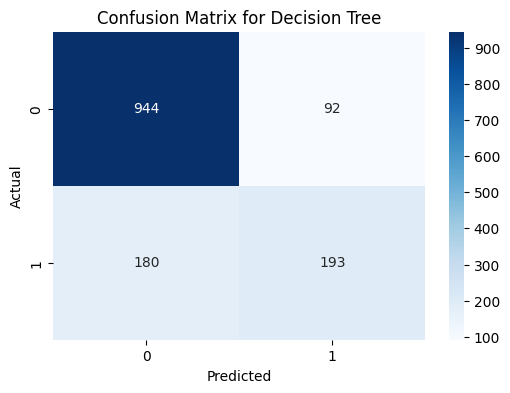

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate and print metrics
def evaluate_model(model_name, y_true, y_pred, y_prob=None):
    print(f"--- Evaluation for {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    if y_prob is not None:
        print("ROC AUC Score:", roc_auc_score(y_true, y_prob))

    # Confusion Matrix visualization
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Create the base model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Hyperparameter tuning using GridSearchCV)
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='f1')
dt_grid.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters for Decision Tree:", dt_grid.best_params_)
best_dt = dt_grid.best_estimator_

# Predict on test set
dt_pred = best_dt.predict(X_test)
dt_prob = best_dt.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("Decision Tree", y_test, dt_pred, dt_prob)


3.Neural Network Model

TensorFlow version: 2.19.0
Ready to build the Neural Network!

=== Starting Training ===
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6850 - loss: 0.5718 - val_accuracy: 0.8148 - val_loss: 0.4103
Epoch 2/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7764 - loss: 0.4572 - val_accuracy: 0.8155 - val_loss: 0.4059
Epoch 3/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4495 - val_accuracy: 0.8126 - val_loss: 0.4037
Epoch 4/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7857 - loss: 0.4452 - val_accuracy: 0.8148 - val_loss: 0.4042
Epoch 5/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: 0.4406 - val_accuracy: 0.8197 - val_loss: 0.4004
Epoch 6/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.4420 - val_accuracy: 0.8155 - val_loss: 0.4017
Epoch 7/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4369 - val_accuracy: 0.8155 - val_loss: 0.4029
Epoch 8/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4328 - val_accuracy: 0.8190

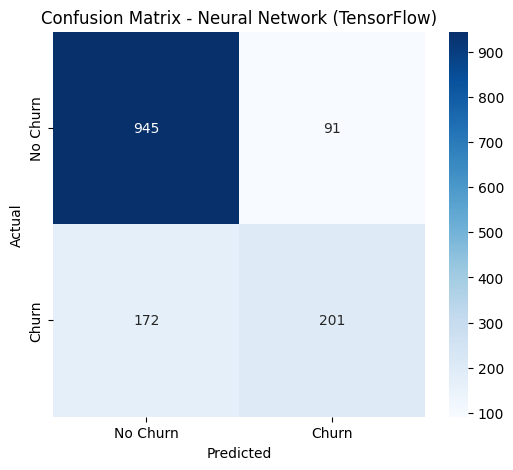

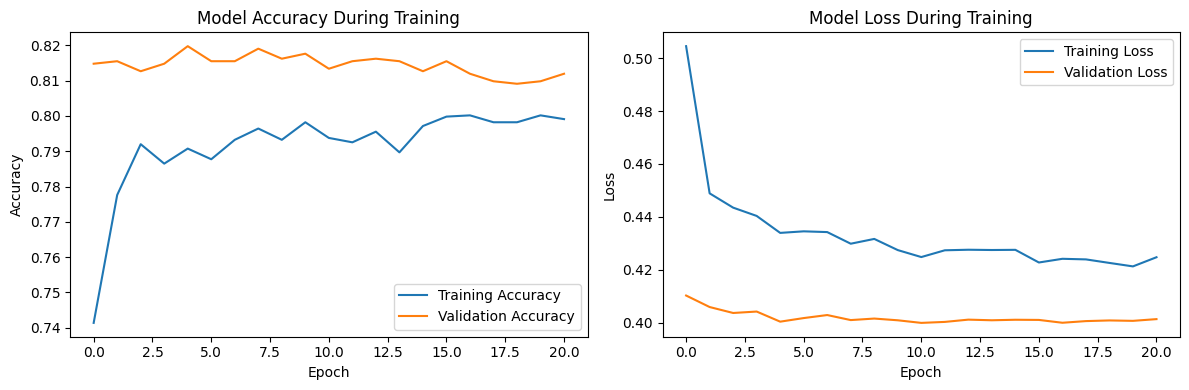

In [20]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np


tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)
print("Ready to build the Neural Network!")

model = Sequential()

# Input + First Hidden Layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

# Second Hidden Layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Third Hidden Layer (smaller)
model.add(Dense(units=16, activation='relu'))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']   )

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


print("\n=== Starting Training ===")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("Training finished!")

# Predict probabilities
y_prob = model.predict(X_test).flatten()

# Convert probabilities to 0 or 1
y_pred = (y_prob >= 0.5).astype(int)

print("\n" + "="*50)
print("       NEURAL NETWORK (TensorFlow) RESULTS")
print("="*50)

print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score  : {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_prob):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Neural Network (TensorFlow)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Training History
plt.figure(figsize=(12,4))

# Plot Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Basic Decison Tree

1. BASIC DECISION TREE (No Tuning)
   Accuracy: 0.7402 | F1-Score: 0.5014


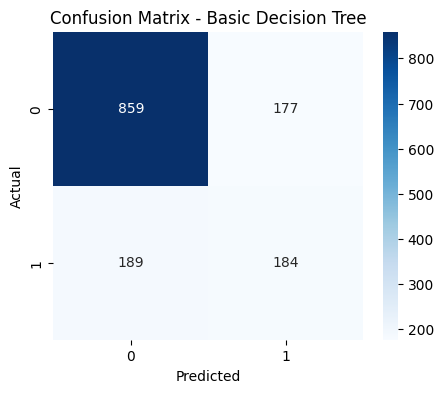

In [21]:
print("1. BASIC DECISION TREE (No Tuning)")
basic_dt = DecisionTreeClassifier(random_state=42)
basic_dt.fit(X_train, y_train)
basic_pred = basic_dt.predict(X_test)

basic_acc = accuracy_score(y_test, basic_pred)
basic_f1  = f1_score(y_test, basic_pred)
print(f"   Accuracy: {basic_acc:.4f} | F1-Score: {basic_f1:.4f}")

# Confusion matrix for basic model
cm_basic = confusion_matrix(y_test, basic_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Basic Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. BASIC NEURAL NETWORK


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Accuracy: 0.8084 | F1-Score: 0.6176


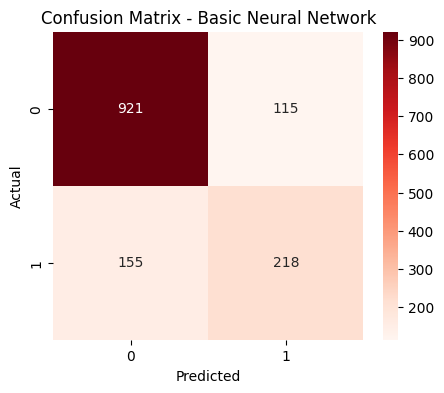

In [22]:
# BASIC Neural Network
print("1. BASIC NEURAL NETWORK")
basic_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

basic_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0,
                validation_data=(X_test, y_test))

basic_prob = basic_model.predict(X_test).flatten()
basic_pred = (basic_prob >= 0.5).astype(int)

basic_acc = accuracy_score(y_test, basic_pred)
basic_f1  = f1_score(y_test, basic_pred)
print(f"   Accuracy: {basic_acc:.4f} | F1-Score: {basic_f1:.4f}")

cm_basic_nn = confusion_matrix(y_test, basic_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_basic_nn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Basic Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()